In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('/content/BBC News Train.csv')

In [49]:
df.head()

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [50]:
df.shape

(1490, 3)

In [51]:
df['Category'].unique()

array(['business', 'tech', 'politics', 'sport', 'entertainment'],
      dtype=object)

In [52]:
?sns.countplot(df['Category'])

In [89]:
train_qs = pd.Series(df['Text'].tolist()).astype(str)

(-0.5, 1439.5, 1079.5, -0.5)

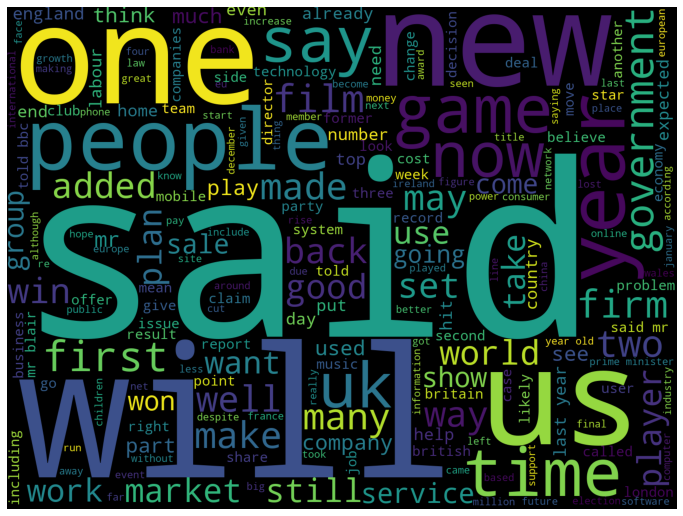

In [91]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(12, 12))
plt.imshow(cloud)
plt.axis('off')

## there is no sort of data imbalance in this case

In [9]:
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [10]:
!pip install texthero

     |████████████████████████████████| 235 kB 7.7 MB/s 
     |████████████████████████████████| 1.5 MB 41.8 MB/s 
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [53]:
import texthero as hero

df['pca'] = (
   df['Text']
   .pipe(hero.clean)
   .pipe(hero.tfidf)
   .pipe(hero.pca)
)

In [54]:
df.head()

,ArticleId,Text,Category,pca
0,1833,worldcom ex-boss launches defence lawyers defe...,business,"[0.0337205189441116, 0.025219618944344543]"
1,154,german business confidence slides german busin...,business,"[0.014186788923205846, 0.10537442466642184]"
2,1101,bbc poll indicates economic gloom citizens in ...,business,"[0.03613610459612517, 0.06520600363654792]"
3,1976,lifestyle governs mobile choice faster bett...,tech,"[-0.025100732290804145, 0.23538681086697796]"
4,917,enron bosses in $168m payout eighteen former e...,business,"[-0.01957158968957228, 0.036017333275243965]"


In [55]:
data=pd.Series(df['Text'])

In [32]:
cleaned_data=hero.clean(data)

In [57]:
df1=pd.concat([df['Category'],cleaned_data],axis=1)

In [58]:
df1.head()

,Category,Text
0,business,worldcom ex boss launches defence lawyers defe...
1,business,german business confidence slides german busin...
2,business,bbc poll indicates economic gloom citizens maj...
3,tech,lifestyle governs mobile choice faster better ...
4,business,enron bosses 168m payout eighteen former enron...


In [74]:
df1['Text'][2]


'bbc poll indicates economic gloom citizens majority nations surveyed bbc world service poll believe world economy worsening respondents also said national economy getting worse asked family financial outlook majority countries said positive future almost people countries questioned poll mostly conducted asian tsunami disaster poll found majority plurality people countries believed economy going downhill compared respondents nine countries believed improving surveyed three countries split percentage terms average respondents country said world economy getting worse compared said improving similarly pessimistic national economy optimistic saw family economic conditions improving said getting worse poll people conducted international polling firm globescan together program international policy attitudes pipa university maryland world economy picked difficult times years ago people seem fully absorbed development though personally experiencing effects said pipa director steven kull people

### we hava the cleaned data now

In [60]:
vector=TfidfVectorizer(use_idf=True,lowercase=True)

In [61]:
vector.fit(df1)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [62]:
y=df1.Category
x=vector.fit_transform(df1.Text)

In [63]:
x.shape

(1490, 24079)

In [64]:
vector.get_feature_names()[1129]

'alliances'

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [66]:
clf = naive_bayes.MultinomialNB()
model=clf.fit(x_train, y_train)

In [68]:
yt=model.predict(x_test)

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
print(confusion_matrix(yt,y_test))

[[89  1  2  0  1]
 [ 0 60  0  0  0]
 [ 1  1 68  0  3]
 [ 0  1  1 81  1]
 [ 2  0  0  0 61]]


In [83]:
!unzip '/content/BBC News Test.csv.zip'

Archive:  /content/BBC News Test.csv.zip
  inflating: BBC News Test.csv       


### we will use countvectorizer as well for predicting 

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [86]:
import pickle

In [87]:
pickle.dump(cv,open('transform.pkl','wb'))


In [88]:
pickle.dump(,open('nlp_model1.pkl','wb'))